# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split   
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor     
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression     

In [2]:
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Overview of the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\omdes\Desktop\data\Dataset-main\insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Visualize Data

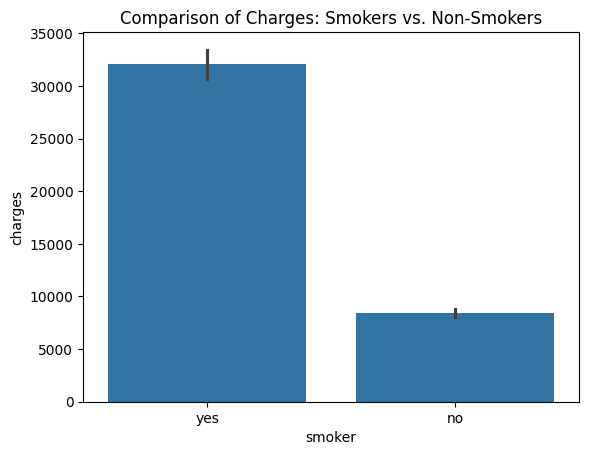

In [9]:
# Charges vs. Smoker Status
sns.barplot(data=df, x='smoker', y='charges')
plt.title('Comparison of Charges: Smokers vs. Non-Smokers')
plt.show()
# Smokers pay more for healthcare than non-smokers.

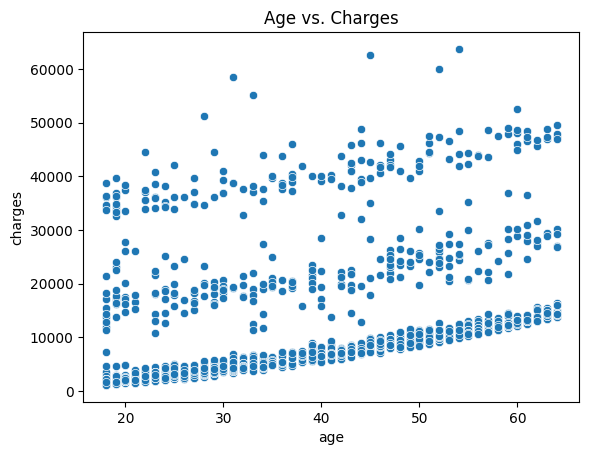

In [10]:
# Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.show()
# Although the age distribution is similar, we observe an upward trend in minimum expenditures as age increases.

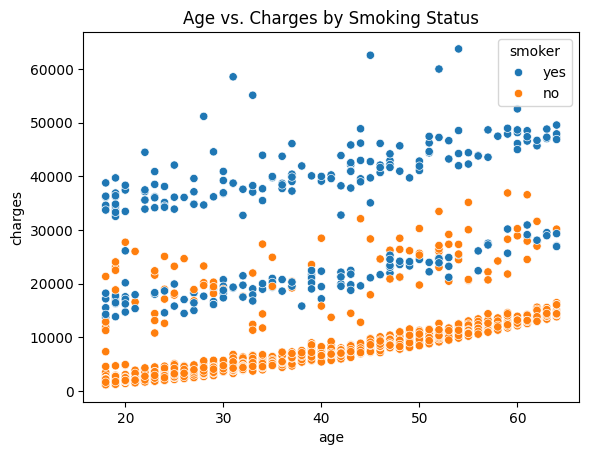

In [11]:
# Age vs. Charges by Smoking Status
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs. Charges by Smoking Status')
plt.show()
# It is noteworthy that smokers paid more throughout the graph.

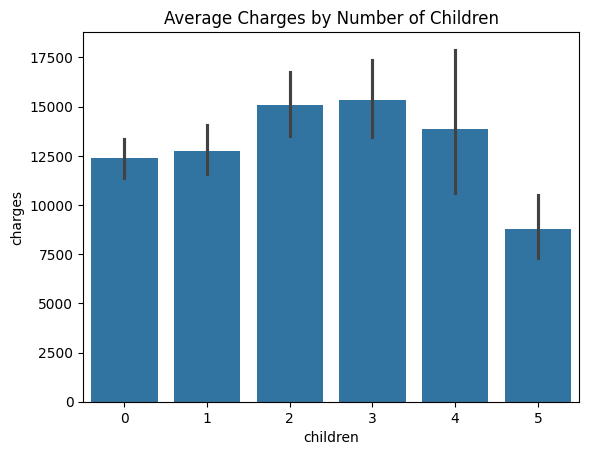

In [12]:
# Average Charges by Number of Children
sns.barplot(x='children', y='charges', data=df)
plt.title('Average Charges by Number of Children')
plt.show()

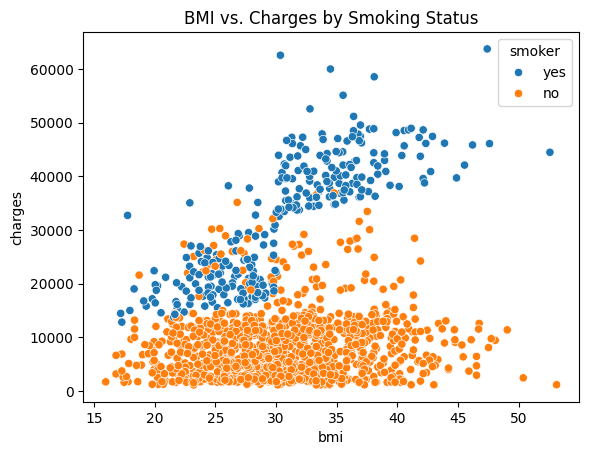

In [13]:
# BMI vs. Charges by Smoking Status
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs. Charges by Smoking Status')
plt.show()
# The same trend continues when BMI is considered.

# Encoding the Data

In [14]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

ohe = preprocessing.OneHotEncoder()

region = df.iloc[:,5:6].values
print(region)

region = ohe.fit_transform(region).toarray()
df['region'].unique()
df2 = pd.DataFrame(data = region, index = range(1338), columns=['southwest', 'southeast', 'northwest', 'northeast'])
print(df2)

df.drop('region', axis=1, inplace= True)

df = pd.concat([df,df2],axis=1)
print(df)

[['southwest']
 ['southeast']
 ['southeast']
 ...
 ['southeast']
 ['southwest']
 ['northwest']]
      southwest  southeast  northwest  northeast
0           0.0        0.0        0.0        1.0
1           0.0        0.0        1.0        0.0
2           0.0        0.0        1.0        0.0
3           0.0        1.0        0.0        0.0
4           0.0        1.0        0.0        0.0
...         ...        ...        ...        ...
1333        0.0        1.0        0.0        0.0
1334        1.0        0.0        0.0        0.0
1335        0.0        0.0        1.0        0.0
1336        0.0        0.0        0.0        1.0
1337        0.0        1.0        0.0        0.0

[1338 rows x 4 columns]
      age  sex     bmi  children  smoker      charges  southwest  southeast  \
0      19    0  27.900         0       1  16884.92400        0.0        0.0   
1      18    1  33.770         1       0   1725.55230        0.0        0.0   
2      28    1  33.000         3       0   4449.46200 

# Preparing Data for Modeling

In [15]:
x = df.drop('charges', axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Modeling

In [16]:
lr= LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
lr.score(x_test,y_test)

0.7696118054369009

In [19]:
dt=DecisionTreeRegressor()

In [20]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
dt.score(x_test,y_test)

0.7292042121350735

In [22]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
rf.score(x_test,y_test)

0.851843558228017

In [25]:
xgboost = XGBRegressor(n_estimators=100, random_state=42)

In [26]:
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
xgboost.score(x_test,y_test)

0.8306143491515185

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [30]:
grid_search_lr = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [31]:
grid_search_lr.score(x_test,y_test)

0.7696118054369009

In [32]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [34]:
grid_search_dt.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)

In [35]:
grid_search_dt.score(x_test, y_test)

0.8599217889536799

In [36]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [37]:
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [38]:
grid_search_rf.best_estimator_

RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=42)

In [39]:
grid_search_rf.score(x_test,y_test)

0.8637552491334877

In [40]:
grid_search_lr.best_estimator_

LinearRegression(positive=True)

In [41]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [42]:
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)

In [43]:
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [44]:
grid_search_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [45]:
grid_search_xgb.score(x_test,y_test)

0.8754214784922316


# Visualizing  scores of all models

In [46]:
scores = {
    'Linear Regression': lr.score(x_test, y_test),
    'Decision Tree': dt.score(x_test, y_test),
    'Random Forest': rf.score(x_test, y_test),
    'XGBoost': xgboost.score(x_test, y_test),
    'Grid Search Linear Regression':grid_search_lr.score(x_test,y_test),
    'Grid Search Decision Tree': grid_search_dt.score(x_test, y_test),
    'Grid Search Random Forest': grid_search_rf.score(x_test,y_test),
    'Grid Search XGBoost': grid_search_xgb.score(x_test,y_test)
}

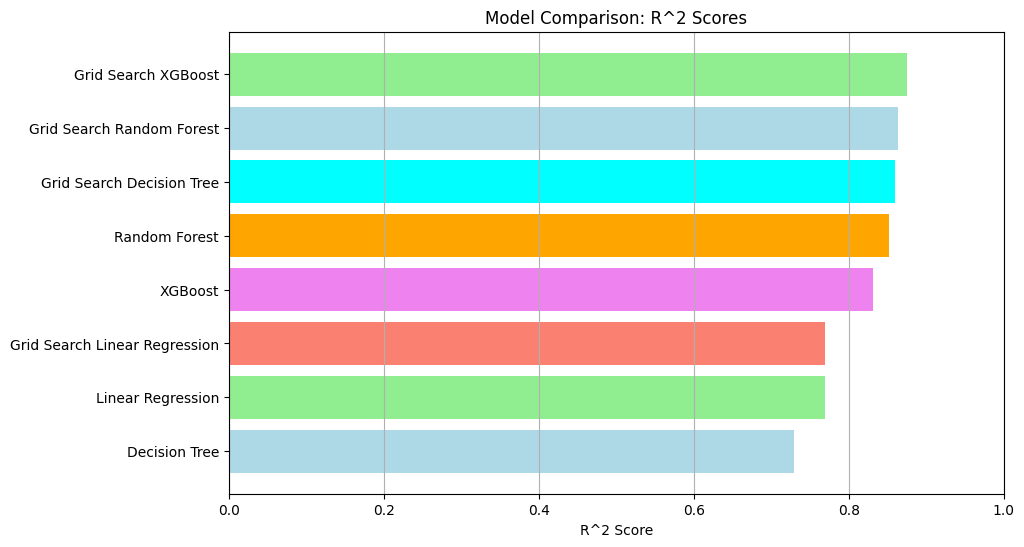

In [47]:
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_scores.keys()), list(sorted_scores.values()), color=['lightblue', 'lightgreen', 'salmon', 'violet', 'orange', 'cyan'])
plt.xlabel('R^2 Score')
plt.title('Model Comparison: R^2 Scores')
plt.xlim(0, 1)  # Adjust the x-axis limits as necessary
plt.grid(axis='x')
plt.show()